In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import rankdata, ttest_rel


sample_size = 100
corr_coef = 0.5
random_seed = 1
quartiles = ('Bottom\nQuartile', '2nd\nQuartile', '3rd\nQuartile', 'Top\nQuartile')

rng = np.random.default_rng(random_seed)
test_score = rng.normal(size=sample_size)

perceived_ability = (
    np.sqrt(1 - corr_coef * corr_coef) * rng.normal(size=sample_size)
    + corr_coef * test_score
)

def percentile(x):
    return rankdata(x) * 100 / len(x)

def quartile_cut(x):
    return pd.qcut(x, 4, labels=quartiles)

data = pd.DataFrame({
    'test_score_percentile': percentile(test_score),
    'perceived_ability_percentile': percentile(perceived_ability),
    'test_score_quartile': quartile_cut(test_score),
    'perceived_ability_quartile': quartile_cut(perceived_ability),
})

print(data)

    test_score_percentile  perceived_ability_percentile test_score_quartile  \
0                    71.0                          38.0       3rd\nQuartile   
1                    87.0                          91.0       Top\nQuartile   
2                    69.0                          54.0       3rd\nQuartile   
3                     9.0                          48.0    Bottom\nQuartile   
4                    93.0                          97.0       Top\nQuartile   
..                    ...                           ...                 ...   
95                    2.0                           1.0    Bottom\nQuartile   
96                   42.0                          87.0       2nd\nQuartile   
97                   51.0                          60.0       3rd\nQuartile   
98                    8.0                          42.0    Bottom\nQuartile   
99                   70.0                          23.0       3rd\nQuartile   

   perceived_ability_quartile  
0               2nd

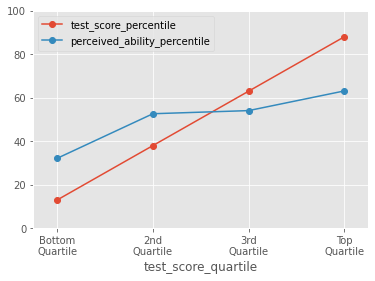

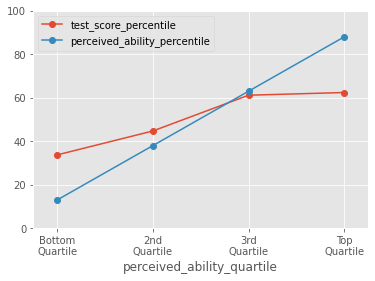

In [2]:
plt.style.use('ggplot')

for quartile in ['test_score_quartile', 'perceived_ability_quartile']:
    (
        data.groupby(quartile)[['test_score_percentile', 'perceived_ability_percentile']].mean()
        .plot.line(marker='o', xlim=(-0.25, 3.25), ylim=(0, 100), xticks=range(4))
    )

plt.show()

In [3]:
print('"Incompetent" participants overestimate their ability, p-value', np.round(
    data[data.test_score_quartile.eq(quartiles[0])]
    .pipe(lambda df: ttest_rel(df.test_score_percentile, df.perceived_ability_percentile).pvalue),
    5
))

print('"Competent" participants underestimate their ability, p-value', np.round(
    data[data.test_score_quartile.eq(quartiles[3])]
    .pipe(lambda df: ttest_rel(df.test_score_percentile, df.perceived_ability_percentile).pvalue),
    5
))

"Incompetent" participants overestimate their ability, p-value 0.00305
"Competent" participants underestimate their ability, p-value 7e-05
